# SLU05 - Covariance and Correlation: Learning notebook

In the last SLU, we looked at statistics that helps us understand the behaviour of a single variable. Here we look at measure describing relationships between two variables that helps us understand if they vary in the same way or completely differently.

Some quick imports to get us started:

In [1]:
import pandas as pd 
import numpy as np 

# The following is to make some plots along the way 
import seaborn as sns 
from matplotlib import pyplot as plt 

# California housing dataset
from sklearn.datasets import fetch_california_housing

# Some utils to avoid filling this notebook with support code 
import utils

## 1. First, a bit of context  

Let's start with a simple question:

What is the relationship between a bunch of kids' age and their height?

This is something for which we have an intuition. If the height goes up when the age goes up, there is some sort of "positive" relationship happening. If it's the other way around, then the relationship is negative. 

There are multiple ways, however, to quantify these relationships. In this learning unit, we shall be going through a few. 

For this notebook, we will use a tiny dataset of kids' heights and ages, which is the following: 

In [2]:
data_metric = utils.get_heights_data_metric()
data_metric

,ages,heights
0,2,120
1,4,125
2,4,127
3,6,135
4,8,140
5,9,139
6,12,170
7,14,210


Before we jump into the deep end, let's get a visual intuition of our data. 

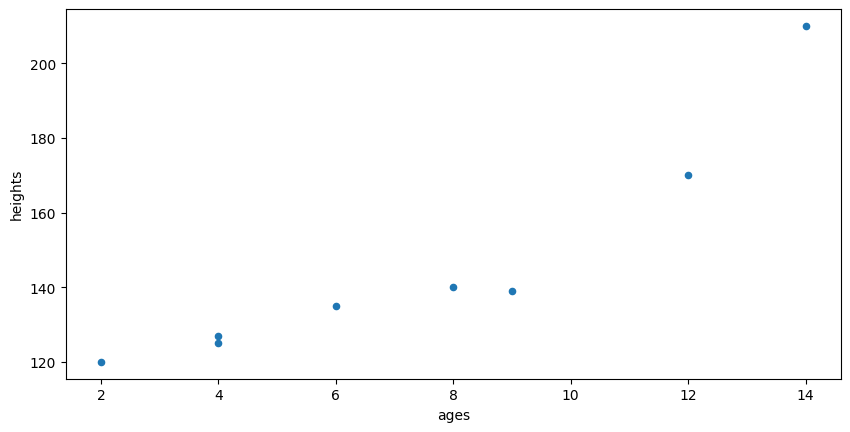

In [3]:
utils.quick_scatterplot(data_metric)

Clearly, the older the kids are, the taller they get, with some exceptions here and there. 

## 2. Covariance 

For all practical purposes, covariance is, quite simply, a measure of how much two variables change together.

Its definition is given by the following: 

$$ cov = \frac{\sum{(X - X_{avg})(Y - Y_{avg})}}{n-1} $$

Where
- $n$ is the number of points
- $X_{avg}$ is the mean X (in this case the mean age of all kids)
- $Y_{avg}$ is the mean Y (in this case the mean height of all kids)

The top part of this equation can be visualized by drawing the following: 
1. A cross in the $(X_{avg}, Y_{avg})$ point   
2. Squares between the mean (age, height) point, and the observed (age, height) points. 

I'll draw one here for the kid with $(age=12, height=170)$ 

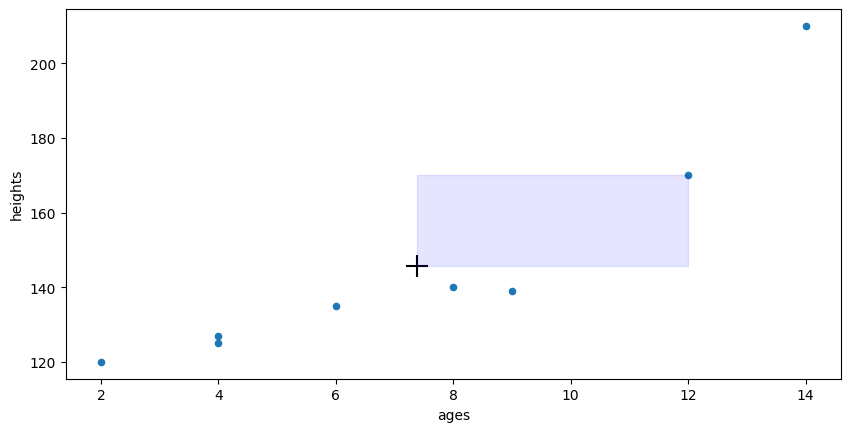

In [4]:
utils.quick_scatterplot(data_metric, plot_center=True, plot_squares=6)

By observing the equation, we can notice that some "squares" will count negatively to the covariance (for instance, the kid with $(age=9, height=139)$, because 
$$(9-7.375) * (139 - 145.75) \approx -11 $$
(notice that `Age_avg=7.375`, `Height_avg=145.75`) 

We will represent these in red: 

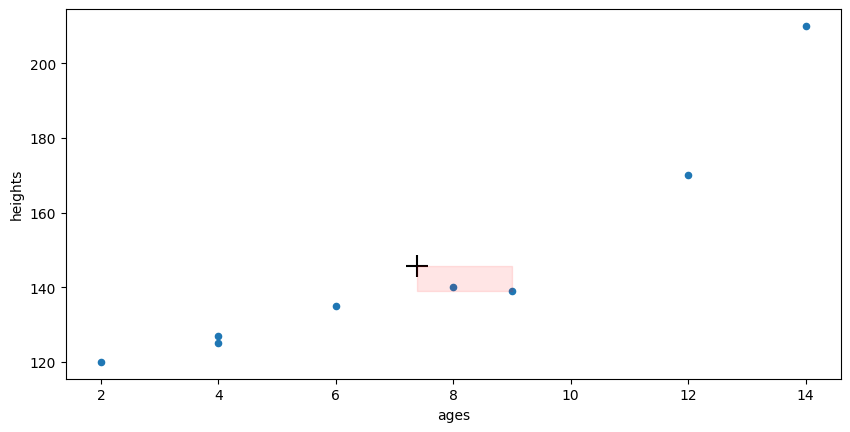

In [5]:
utils.quick_scatterplot(data_metric, plot_center=True, plot_squares=5)

So a simple visual intuition for covariance is "the blue, minus the red":

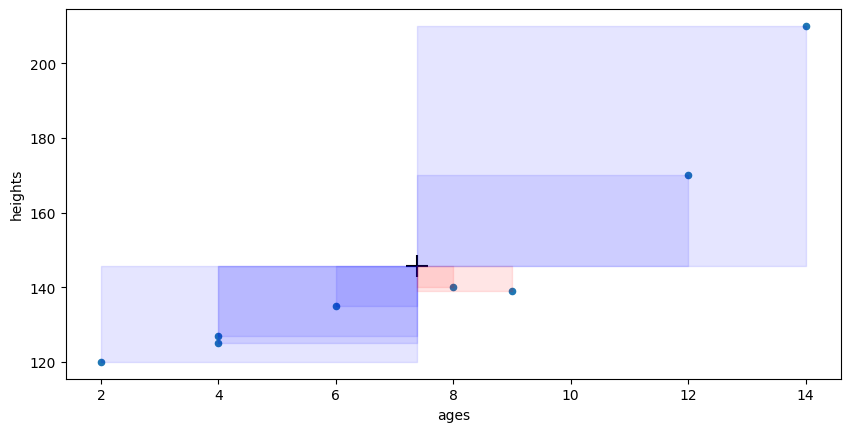

In [6]:
utils.quick_scatterplot(data_metric, plot_center=True, plot_squares='all')

### 2.1 Calculating covariance by hand 
Great! Now that we have a visual intuition, we can simply calculate this by hand.

A quick reminder of the formula: 
$$ cov = \frac{\sum{(X - X_{avg})(Y - Y_{avg})}}{n-1} $$

In [7]:
# subtract the mean age from each of the ages 
mean_age = data_metric['ages'].mean()
data_metric['ages - mean_age'] = data_metric['ages'] - mean_age

# subtract the mean height from each of the heights 
mean_height = data_metric['heights'].mean()
data_metric['heights - mean_height'] = data_metric['heights'] - mean_height

# get the product between the two columns we just calculated 
data_metric['product of differences'] = (
    data_metric['ages - mean_age'] * data_metric['heights - mean_height'])

In [8]:
data_metric.head()

,ages,heights,ages - mean_age,heights - mean_height,product of differences
0,2,120,-5.375,-25.75,138.40625
1,4,125,-3.375,-20.75,70.03125
2,4,127,-3.375,-18.75,63.28125
3,6,135,-1.375,-10.75,14.78125
4,8,140,0.625,-5.75,-3.59375


Alright, so to calculate the top of the fraction, we just need to sum the last column.

In [9]:
top_of_fraction = data_metric['product of differences'].sum()


$$ cov = \frac{\sum{(X - X_{avg})(Y - Y_{avg})}}{n-1} $$

The bottom half is `n-1`, where `n` is the number of rows. We have the [`.shape`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html) command to get that! 

In [10]:
covariance_by_hand = top_of_fraction / (data_metric.shape[0] - 1)

So how much is our co-variance, calculated by hand? 

In [11]:
print('Covariance by hand = %0.2f' % covariance_by_hand)

Covariance by hand = 115.68


Well, that was boring! Let's just use 1 line of Pandas instead: 

In [12]:
covariance_with_pandas = data_metric['ages'].cov(data_metric['heights'])

In [13]:
print('Covariance with Pandas = %0.2f' % covariance_with_pandas)

Covariance with Pandas = 115.68


### 2.2 Quick summary of what we did

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>ages</th>      <th>heights</th>      <th>ages - mean_age</th>      <th>heights - mean_height</th>      <th>product of differences</th>    </tr>  </thead>  <tbody>    <tr>      <th>0</th>      <td>2</td>      <td>120</td>      <td>-5.375</td>      <td>-25.75</td>      <td>138.40625</td>    </tr>    <tr>      <th>1</th>      <td>4</td>      <td>125</td>      <td>-3.375</td>      <td>-20.75</td>      <td>70.03125</td>    </tr>    <tr>      <th>2</th>      <td>4</td>      <td>127</td>      <td>-3.375</td>      <td>-18.75</td>      <td>63.28125</td>    </tr>    <tr>      <th>3</th>      <td>6</td>      <td>135</td>      <td>-1.375</td>      <td>-10.75</td>      <td>14.78125</td>    </tr>    <tr>      <th>4</th>      <td>8</td>      <td>140</td>      <td>0.625</td>      <td>-5.75</td>      <td>-3.59375</td>    </tr>  </tbody></table>

Let's consider the units here. We did some weird things: 
1. Subtracted the mean height (**cm**) from each height, meaning that our column `"heights - mean_height"` was in **cm** 
2. Subtracted the mean age (**years**) from each age, meaning that our column `"ages - mean_age"` was in **years**
3. We then multiplied these two, making our column `"product of differences"` be in the odd unit of **`cm.years`**
4. Now we summed over the observations, keeping the units (**`cm.years`**) 
5. We finally divided by the number of observations (minus one), so the unit is still **`cm.years`**

What this means in practice is that if someone asked you how the heights and ages were related, using covariance would lead to the awkward answer:

![poor answer](https://i.imgflip.com/27xd7y.jpg)

Which is perfectly correct, but not particularly informative. For one thing, it depends on the magnitude of the variables, which is counter-intuitive.

If we were measuring heights in inches instead of centimeters, would the relationship become weaker? The variance would certainly change!  

The problem here is that the metric is giving you an idea of the extent to which the variables change together, which sounds good, but is dependent on the magnitude of the variables themselves, and generally not actually what we want. 

More often than not, we want to answer the question of how strong is the relationship between these two variables? And to answer that question, as you might have guessed, we have our old friend, the correlation. 

### 2.3 Why use correlation 

Let's think about this. The covariance for our age and heights problem was `115.68 cm.years`. 

We don't like this "`cm.years`" nonsense and want a measure that will hold even if we are working with feet instead of centimeters.  
(_Note: 1ft ~ 30.48cm in Freedom Units <sup>TM</sup>_) 

In [14]:
# The same dataset, but now with the heights in feet, instead of 
# centimeters.
data_freedom_units = utils.get_heights_data_freedom_units()
# Let's take a look 
data_freedom_units.head(5)

,ages,heights
0,2,3.937008
1,4,4.101050
2,4,4.166667
3,6,4.429134
4,8,4.593176


Now that the dataset is in feet, our covariance will go down because the magnitude of our heights will be on a smaller scale. Can you spot that in the expression? 

$$ cov = \frac{\sum{(Height_i - Height_{mean})(Age_i - Age_{mean})}}{n-1} $$

Let's calculate the covariance in metric, and in freedom units, and print it: 

In [15]:
# calculate the covariance in the metric dataset 
covariance_in_metric = data_metric['ages'].cov(data_metric['heights'])

# calculate the covariance in the freedom units dataset 
covariance_in_freedom_units = data_freedom_units['ages'].cov(
    data_freedom_units['heights'])

print('Covariance using centimeters:                      %0.02f (cm.years)  ' 
      % covariance_in_metric)
print('Covariance when using feet instead of centimeters: %0.02f   (ft.years)' 
      % covariance_in_freedom_units)

Covariance using centimeters:                      115.68 (cm.years)  
Covariance when using feet instead of centimeters: 3.80   (ft.years)


So this kind of sucks. Depending on how we measure it, we get different "amount of relationship", which is very counterintuitive. 

<img src="https://i.imgflip.com/27xlme.jpg" width="500">

## 3. Correlation 

Correlation is covariance's prettier, cooler, and more successful sibling. 

There are multiple reasons for this:
1. Correlation is adimensional (unit free), so it's easier to think about (none of this "cm.years" nonsense) 
2. The value of correlation takes place between -1 and +1, while covariance lies between -∞ and +∞.
3. Correlation is not affected by the change in scale, while covariance is. 

As you grow older, you will likely forget about covariance and remember only correlation, like everyone remembers Bill Gates and no-one remembers Paul Allen (in this analogy, Bill Gates is the "cool one"). 

But before you toss covariance into the dustbin of your mind, remember only this: 

&emsp;Correlation is just normalized covariance.

Normalized by what, I heard you ask? By variance! 

$$ correlation = \frac{covariance(X, Y)}{\sqrt{Var(X) \times Var(Y)}} $$

A quick recap of the concept of variance: it is defined as a measure of variability calculated by taking the average of squared deviations from the mean. It tells you the degree of spread in your data set. The more spread is the data, the larger is the variance in relation to the mean.

Remember that when the heights turned to feet, our covariance went down? Well, the $\sqrt{Var(X) \times Var(Y)}$ term in the correlation comes to the rescue here because it will also become proportionately smaller. 

Let's try: 

In [16]:
# get the variance of the ages (same for both datasets)
variance_ages = data_metric['ages'].var()
# get the variance of the heights in cm 
variance_heights_cm = data_metric['heights'].var()
# get the variance of the heights in feet 
variance_heights_ft = data_freedom_units['heights'].var()

# print the results 
print('In metric system:')
print('Variance of ages:    %0.02f   (years²)' % variance_ages)
print('Variance of heights: %0.02f  (cm²)' % variance_heights_cm)
print('\nIn freedom units')
print('Variance of ages:    %0.02f   (years²)' % variance_ages)
print('Variance of heights: %0.02f    (ft²)' % variance_heights_ft)

In metric system:
Variance of ages:    17.41   (years²)
Variance of heights: 907.93  (cm²)

In freedom units
Variance of ages:    17.41   (years²)
Variance of heights: 0.98    (ft²)


So, when the covariance increases, the variance of the heights also increases, which will offset each other, and allow correlation to be independent of how we measure the heights! 

Now in the meantime, you've probably noticed the metrics of the variance, leading to the question...

<img src="https://i.imgflip.com/27xfyc.jpg" width="600">

That's just the way variance works. It calculated how much your variable is "scattered", but the units aren't intuitive (which is why we generally prefer standard deviation). 

However, using variance gives us a super cool property, which is that correlation has no units! 

$$ correlation = \frac{covariance}{\sqrt{Var(X) \times Var(Y)}}$$

Notice the units: 

$$ \frac { \left( ... \; \text{ft} \times \text{years} \right) }{\sqrt{ \left(... \; \text{years}^2 \right) \times \left(... \; \text{ft}^2 \right) }} = \frac{ \left(... \; \text{ft} \times \text{years} \right) } {\left(... \; \text{ft} \times \text{years} \right) } = \text{Victory is mine!} $$ 

Finally, let's confirm this in Pandas: 

In [17]:
# calculate the correlation in the metric dataset, with Pandas
correlation_in_metric = data_metric['heights'].corr(data_metric['ages'])

# calculate the correlation in the freedom units dataset, with Pandas
correlation_in_freedom_units = (data_freedom_units['heights']
                                .corr(data_freedom_units['ages']))

# print results 
print('Correlation in metric unit system:             %0.2f' 
      % correlation_in_metric)
print('Correlation in imperial (freedom) unit system: %0.2f' 
      % correlation_in_freedom_units)

Correlation in metric unit system:             0.92
Correlation in imperial (freedom) unit system: 0.92


Ye-haw 😎

### 3.1 Positive and negative correlations

Great, so we have an idea about what correlation is. 

Graphically, you can (kind of) think of correlation as the "error bars" of fitting a line to a distribution. 

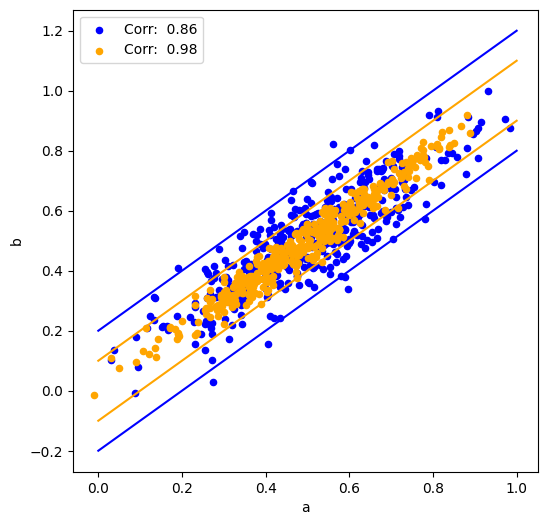

In [18]:
utils.plot_correlation_bars()

This leads to an interesting problem: unlike often believed, correlation is not the angle that a line would take, but rather the "dispersion" around that line. In fact, the following two distributions have the same correlation: 

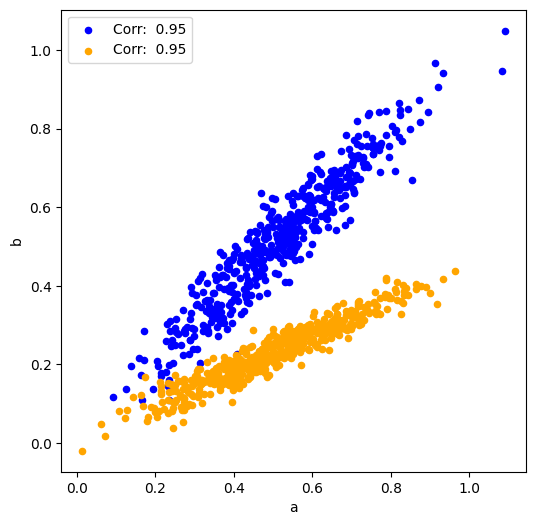

In [19]:
utils.plot_angled_correlations()

However, we know that when a correlation has a "downward slope" it is negative:

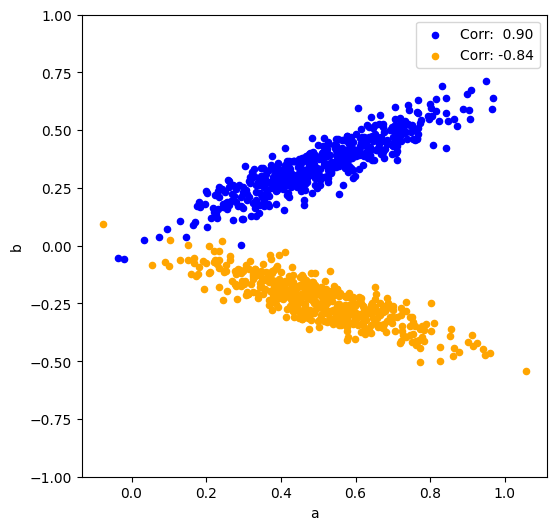

In [20]:
utils.plot_positive_and_negative()

So, while the actual value of the correlation is determined by the data dispersion and not by its perceived slope, an upwards slope is always a positive correlation and a downwards slope is always a negative correlation.

As the last exercise, let's look at what happens when perfectly correlated distributions change slope: 

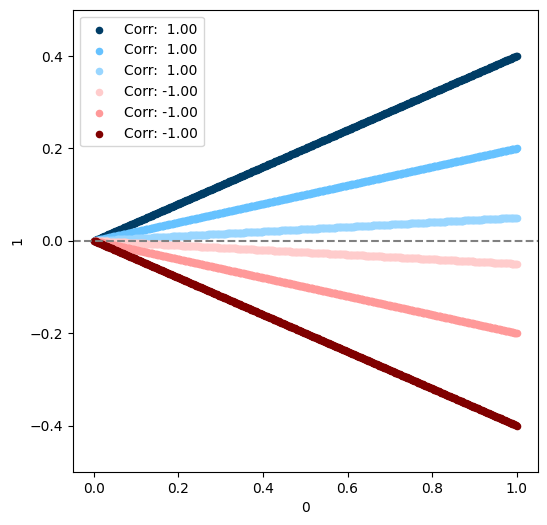

In [21]:
utils.plot_correlated_distrs()

Note that the correlation remains at +1, and "violently" changes to -1 when crossing the horizontal line. 

### 3.2 Pearson vs Spearman correlation 

Confession time! 

<img src="https://i.imgflip.com/27xm3b.jpg" width="400">

There are two types of correlation, Pearson, and Spearman. However, Pearson is so common, that when people just say "correlation" you can pretty much assume that is what they mean. 

### 3.3 Spearman correlation 

Spearman correlation is a "rank correlation". The easiest way to understand the concept is to forget about the actual values and consider only their relative positions (ranks). 

To observe this, we can use pandas' convenient `rank` function: 

In [22]:
# I'll get the dataset again (as we altered it in the explanation above)
data_metric = utils.get_heights_data_metric()

Original: 

In [23]:
data_metric

,ages,heights
0,2,120
1,4,125
2,4,127
3,6,135
4,8,140
5,9,139
6,12,170
7,14,210


Rank: 

In [24]:
data_metric.rank()

,ages,heights
0,1.0,1.0
1,2.5,2.0
2,2.5,3.0
3,4.0,4.0
4,5.0,6.0
5,6.0,5.0
6,7.0,7.0
7,8.0,8.0


So, the youngest age became `1` and the smallest height became `1`. The others then took their rank position. Since there is more than one 2-year-old kid in this dataset they both take position `2.5`, and no one becomes `2` or `3`. If there was a third kid aged 2-years-old, they would have joined the others as rank `2.5`.

Other than the ties, it's very simple.

Let's plot the rank positions: 

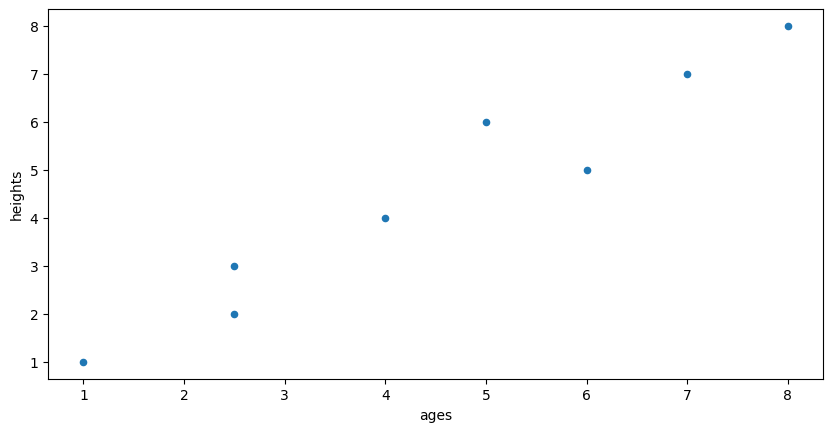

In [25]:
utils.quick_scatterplot(data_metric.rank())

The Spearman correlation is simply the correlation between the rank coefficients. Or, as I like to think of it, the correlation between the "positions on the podium" for height, and "positions on the podium" for age. 

To calculate Spearman correlation, we can use the rank data:

In [26]:
ranked_data = data_metric.rank()
ranked_data['ages'].corr(ranked_data['heights'])

np.float64(0.9700772721497397)

However, because Pandas is for lazy people, we can also just use the argument `method=spearman` .

In [27]:
data_metric['ages'].corr(data_metric['heights'], method='spearman')

np.float64(0.9700772721497398)

### 3.4 Why use Spearman at all

Let's say we are interested in knowing if two stocks generally grow together. They exhibit the following pattern:

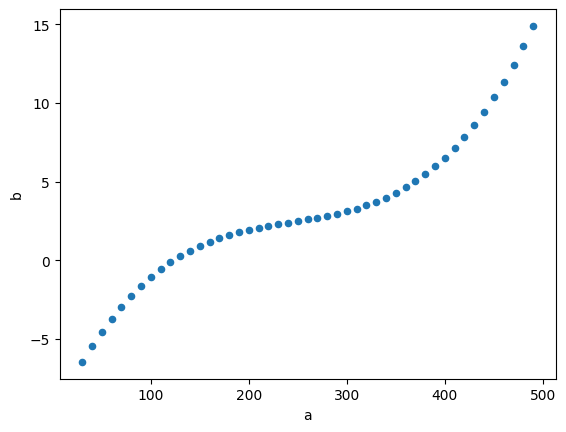

In [28]:
example = utils.get_data_for_spearman()
example.plot(kind='scatter', x='a', y='b');

By looking at them, we can see that while the slope constantly changes (the relationship is not linear), the rank correlation is 100% (the slope change is monotonical, when one goes up, so does the other). The non-linearity kills the Pearson correlation.

In [29]:
print('Pearson correlation: %0.02f' % example['a'].corr(example['b']))
print('Spearman correlation: %0.02f' % example['a'].corr(example['b'], 
                                                         method='spearman'))

Pearson correlation: 0.95
Spearman correlation: 1.00


## 4. Correlation and outliers (or data problems)

So far, we've been looking at two variables at a time. Now, let's get a more interesting data set with information about house prices in California districts: 

In [30]:
d_X, d_Y = fetch_california_housing(return_X_y=True, as_frame=True)
data_california = d_X.join(d_Y)
data_california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Let's see how `MedHouseVal`, median house price in the district, correlates with `MedInc`, the median income in the neighborhood:

In [31]:
print('Pearson correlation: %0.02f' % data_california['MedHouseVal']
      .corr(data_california['MedInc']))
print('Spearman correlation: %0.02f' % data_california['MedHouseVal']
      .corr(data_california['MedInc'], method='spearman'))

Pearson correlation: 0.69
Spearman correlation: 0.68


So there is a clear correlation between the income of the residents in the neighborhood and the median housing price. 

But what happens if one of those houses is artificially more expensive, maybe because it used to belong to someone famous when they were young? 

In [32]:
print('Oh by the way, Obama used to live here...') 
print('Median income:      %0.0f' % data_california.loc[100, 'MedInc'])  
print('Price before knowing: %0.0f' % data_california.loc[100, 'MedHouseVal'])  
data_california.loc[100, 'MedHouseVal'] = 500  # price changes! 
print('Price after knowing:  %0.0f' % data_california.loc[100, 'MedHouseVal'])  

Oh by the way, Obama used to live here...
Median income:      2
Price before knowing: 3
Price after knowing:  500


What happened to correlation once that unusual entry (which is just 1 out of about 20000) shows up? 

In [33]:
print('Pearson correlation: %0.02f' % data_california['MedHouseVal']
      .corr(data_california['MedInc']))
print('Spearman correlation: %0.02f' % data_california['MedHouseVal']
      .corr(data_california['MedInc'], method='spearman'))

Pearson correlation: 0.21
Spearman correlation: 0.68


Conclusion:

Spearman correlation is much more resistant to outliers and data entry problems than Pearson correlation.

## 5. The correlation matrix 

In [34]:
# We'll quickly get rid of Obama
d_X, d_Y = fetch_california_housing(return_X_y=True, as_frame=True)
data_california = d_X.join(d_Y)
data_california.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Intuitively, some of these things should be correlated. 
* Housing prices and number of rooms?
* Median income and average occupancy? 
* Population and house age? 

Instead of going one by one and making all the pairs, we can quickly compute a correlation matrix using the Pandas' `.corr` method. 

In [35]:
data_california.corr(method='pearson')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


This is interesting, and we can see "everything against everything". In practice, this is one of those cases where nothing beats a little visualization. 

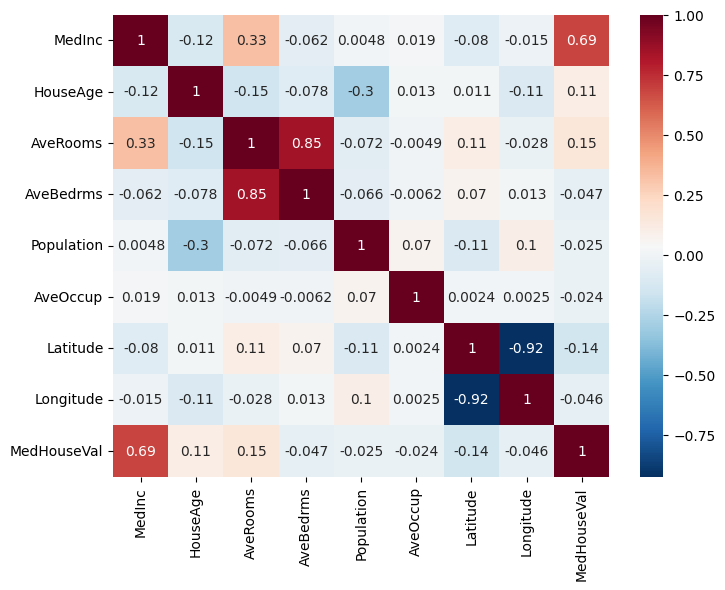

In [36]:
plt.figure(figsize = (8,6)) # <-- just sets the figure size 

sns.heatmap(data_california.corr(), 
            annot=True,     # <-- write the numbers on the squares
            cmap='RdBu_r'); # <-- use a "red into blue, reversed" colormap

I'll let your eyes wonder over this beautiful cascade of interesting information. Pandas is amazing. 

## 6. Advanced correlation matrix

However, we've got a lot of repeated data in the correlation matrix. Basically, the matrix is symmetric, the parts below and above the diagonal are the same.

To get the table with only the bottom triangle, you can use the following: 

In [37]:
# just getting the correlation matrix again 
cor_mat = data_california.corr()

# Bit of crazy numpy. We are getting the triangular matrix 
# the same size as our correlation matrix, with just Trues and 
# Falses, to then use in a mask. (you can just copy paste this though) 
lower_triangle_mask = np.triu(np.ones(cor_mat.shape)).astype(bool)

# Now mask the correlation matrix, keeping only the lower triangle 
cor_mat_lower = cor_mat.mask(lower_triangle_mask)

# Et voila! 
display(cor_mat_lower)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HouseAge,-0.119034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AveRooms,0.326895,-0.153277,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AveBedrms,-0.062040,-0.077747,0.847621,NaN,NaN,NaN,NaN,NaN,NaN
Population,0.004834,-0.296244,-0.072213,-0.066197,NaN,NaN,NaN,NaN,NaN
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,NaN,NaN,NaN,NaN
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,NaN,NaN,NaN
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,NaN,NaN
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,NaN


And now we can make another heatmap.

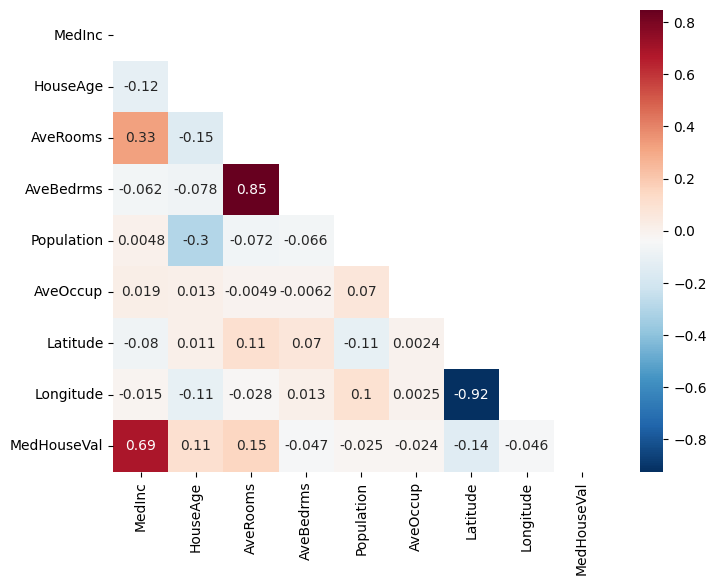

In [38]:
plt.figure(figsize = (8,6)) # <-- just sets the figure size

sns.heatmap(cor_mat_lower, 
            annot=True,     # <-- write the numbers on the squares
            cmap='RdBu_r'); # <-- use a "red into blue, reversed" colormap

A bit cleaner, right? Also, notice that the colors changed, as the scale now goes from 0.85 to -0.92 instead of 1 to -1, which helps with contrast. If you like to have the minimum and maximum and 1/-1, you can use the `vmin` and `vmax` parameters of the [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap).

### 6.1 Getting answers programmatically
We may also just want to get rid of the diagonal, which is particularly interesting when we want to get answers programmatically:

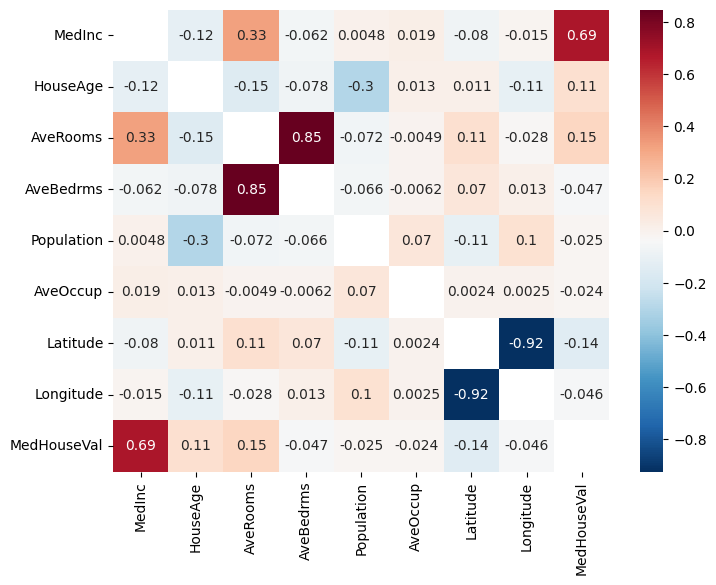

In [39]:
# this time we'll do it 
identity_matrix = np.identity(cor_mat.shape[0]).astype(bool)  # diagonal only
corr_mat_without_diagonal = cor_mat.mask(identity_matrix)

# and now plot 
plt.figure(figsize = (8,6))
sns.heatmap(corr_mat_without_diagonal, annot=True, cmap='RdBu_r');

Using this, it's trivial to get some numerical answers. 

### 6.2 Most anticorrelated features

Let's answer the following question: 

&emsp;What is the feature that correlates most negatively with house age?

In [40]:
# getting the house age row is now trivial:
house_age_corrs = corr_mat_without_diagonal.loc['HouseAge']
house_age_corrs

MedInc        -0.119034
HouseAge            NaN
AveRooms      -0.153277
AveBedrms     -0.077747
Population    -0.296244
AveOccup       0.013191
Latitude       0.011173
Longitude     -0.108197
MedHouseVal    0.105623
Name: HouseAge, dtype: float64

To answer the question, we can just use idxmin (and min, if we want the amount too).

In [41]:
strongest_anticorrelating_feature = house_age_corrs.idxmax()
amount_of_that_anticorrelation = house_age_corrs.max()

print('The feature that most negatively correlates with %s is %s (correlation: %0.2f)' % (
    'house age', strongest_anticorrelating_feature, amount_of_that_anticorrelation))

The feature that most negatively correlates with house age is MedHouseVal (correlation: 0.11)


Which kind of makes sense. We can obviously do the opposite with `min` and `idxmin`. 

By the way, what happens if we call `idxmin` directly on the correlation matrix without the diagonal?  

In [42]:
corr_mat_without_diagonal.idxmin()

MedInc            HouseAge
HouseAge        Population
AveRooms          HouseAge
AveBedrms         HouseAge
Population        HouseAge
AveOccup       MedHouseVal
Latitude         Longitude
Longitude         Latitude
MedHouseVal       Latitude
dtype: object

We get the most negatively correlated feature for each feature. In any case, it's a good idea to inspect the numbers. Most of them are not very large and the largest anticorrelation might be even called spurious (see next section).

### 6.2 Correlation pairs

Finally, what are the highest/lowest correlation pairs? 

We can do this programmatically with a bit of Pandas black magic, using the `unstack` method. 

Let's take our triangular matrix: 

In [43]:
cor_mat_lower

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HouseAge,-0.119034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AveRooms,0.326895,-0.153277,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AveBedrms,-0.062040,-0.077747,0.847621,NaN,NaN,NaN,NaN,NaN,NaN
Population,0.004834,-0.296244,-0.072213,-0.066197,NaN,NaN,NaN,NaN,NaN
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,NaN,NaN,NaN,NaN
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,NaN,NaN,NaN
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,NaN,NaN
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,NaN


What we want to know is the absolute largest pair, so we unstack. What does that mean? 

In [44]:
cor_mat_lower_unstacked = cor_mat_lower.unstack().dropna()
cor_mat_lower_unstacked.head(20)

MedInc    HouseAge      -0.119034
          AveRooms       0.326895
          AveBedrms     -0.062040
          Population     0.004834
          AveOccup       0.018766
          Latitude      -0.079809
          Longitude     -0.015176
          MedHouseVal    0.688075
HouseAge  AveRooms      -0.153277
          AveBedrms     -0.077747
          Population    -0.296244
          AveOccup       0.013191
          Latitude       0.011173
          Longitude     -0.108197
          MedHouseVal    0.105623
AveRooms  AveBedrms      0.847621
          Population    -0.072213
          AveOccup      -0.004852
          Latitude       0.106389
          Longitude     -0.027540
dtype: float64

Yep, it makes the index have two levels and leaves us with a Series. Don't worry too much about this now, but notice that you can now do this: 

In [45]:
cor_mat_lower_unstacked.nlargest(5)

AveRooms  AveBedrms      0.847621
MedInc    MedHouseVal    0.688075
          AveRooms       0.326895
AveRooms  MedHouseVal    0.151948
          Latitude       0.106389
dtype: float64

In [46]:
cor_mat_lower_unstacked.nsmallest(1)

Latitude  Longitude   -0.924664
dtype: float64

Which I think you'll admit is pretty sweet. 

## 7. Spurious correlations 

A well-known but very often overlooked fact is that **CORRELATION DOES NOT IMPLY CAUSATION**.

<img src="https://ic.pics.livejournal.com/mi3ch/983718/4592053/4592053_original.png" width="800">

_Image Source: [spurious correlations](http://www.tylervigen.com/spurious-correlations), visit the website to see more of these_.

The temptation to use correlation is often overwhelming. Common arguments include: 

&emsp;_"Maybe it's not causation, but for practical purposes I can use it anyway"_

&emsp;_"Well, we need to check the p-values, sure, but then it's safe, right?"_

As a data scientist, it is one of your primary responsibilities to be skeptical. Part of that comes from understanding that data, if tortured, will tell you whatever you want it to. 

For instance, if you dive into a dataset of stocks and look for really strong correlations, you will find them. That in no way means you are going to become rich. The likelihood that you won't find anything, given the number of tries you are making, is very, very small, and therefore your "expected" status is... to find something. 

Skepticism as a way of thinking is (or should be) at the core of healthy data science. Following the scientific method and searching for evidence that leads you to refute the null hypothesis that your theory is wrong will protect you against falling into the giant trap that is the [allure of the siren](https://en.wikipedia.org/wiki/Siren_(mythology)) of correlation. 

<img src="data/siren.jpg" width="500">

## 8. Observational and experimental data 

One crucial concept to keep in mind is the one of experimental vs. observational data.

The fundamental difference is that experimental data was collected in a controlled experiment by the researcher while trying to control as many variables as possible and using randomness to assign control groups, whereas observational data is simply collected by observing events, including eventual control groups.

Observational data is unavoidable in situations where experimental interference would be unethical or unfeasible. For instance, it is not possible to expose people to noxious substances, but people accidentally exposed can be studied. Likewise, in large cross-sectional or longitudinal population studies it is impossible to control the study participants, so observational data on what is happening, like people's nutrition or exercise patterns, is collected.

At the same time, experimental data also has its limitations, as the simplified artificial setup may be too simple to catch the whole picture and influence the outcome.

### 8.1 Why is this important? 

Observational data can be trickier in that it can more easily be influenced by unidentified confound variables (of course, this can happen also with experimental data because you just don't have enough insight into the matter to identify the confounder).

Consider a simple example:

&emsp;*You collect data on sunburns and ice cream consumption. You find that higher ice cream consumption is associated with a higher probability of sunburn. Does that mean ice cream consumption causes sunburn?* 

At "first sight", the answer would be "yes", but if you're a smart researcher, you'd certainly notice one tiny detail... 

<img src="data/sun.jpg" width="400">

In words, while the observed association suggests a strong relationship between ice cream consumption and sunburn, it's also crucial to understand the role of sun exposure in this scenario. This is what is called a **confounding variable**.

The key factor is to recognize that **correlation does not imply causation!** Without understanding potential confounding variables any established cause-effect relationship is, at the very best, mere speculation.

<img src="https://explorable.com/sites/default/files/documents/third-variable.png" width="700">

So, although sunburns and ice cream consumption are highly correlated, without further investigation we found overwhelming evidence of... nothing much.

### 8.2 What is there to be done? 

If you cannot control all variables, there are various statistical techniques which try to account for confounding variables. As an example, in this specific case, you could try to stratify participants based on their sun exposure levels. Of course it would require more data and more investigation.

### 8.3 Key factors to keep in mind

When using either experimental or observational data, there are a few things that we must always keep in mind: 

1. Correlation is not causation 
2. Data, despite its reputation to the contrary, lies. 

## 9. Further reading

* [Discussion on stackexchange: covariance](https://stats.stackexchange.com/questions/18058/how-would-you-explain-covariance-to-someone-who-understands-only-the-mean)
* [Discussion on stackexchange: experimental vs observational data](https://stats.stackexchange.com/questions/13300/difference-between-experimental-data-and-observational-data)